In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [ ]:
customers = pd.read_csv('Ecommerce Customers')

In [ ]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**Exploratory Data Analysis**

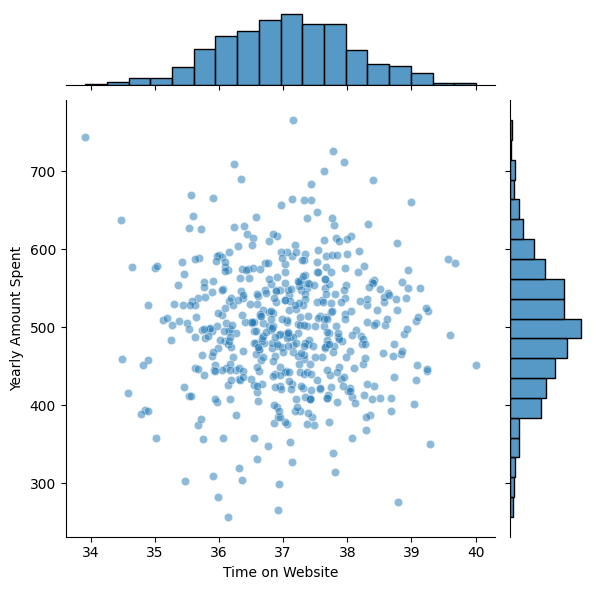

In [ ]:
# time on website vs yearly amount spent
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, alpha=0.5)

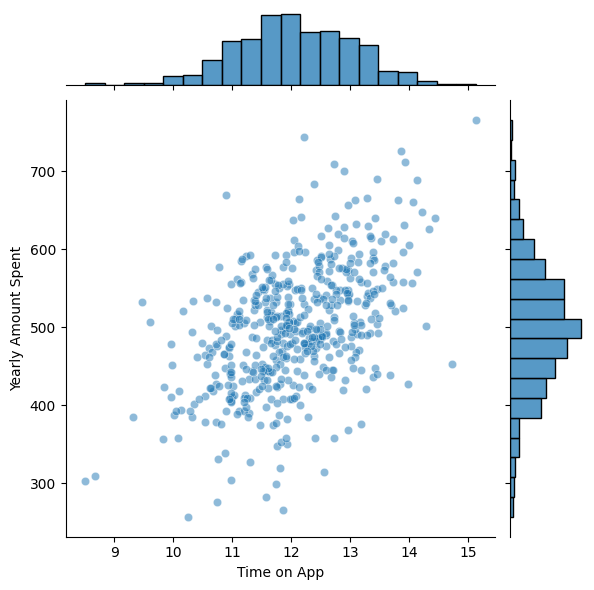

In [ ]:
# time on app vs yearly amount spent
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, alpha=0.5)

**Pairplot of all numerical variables**

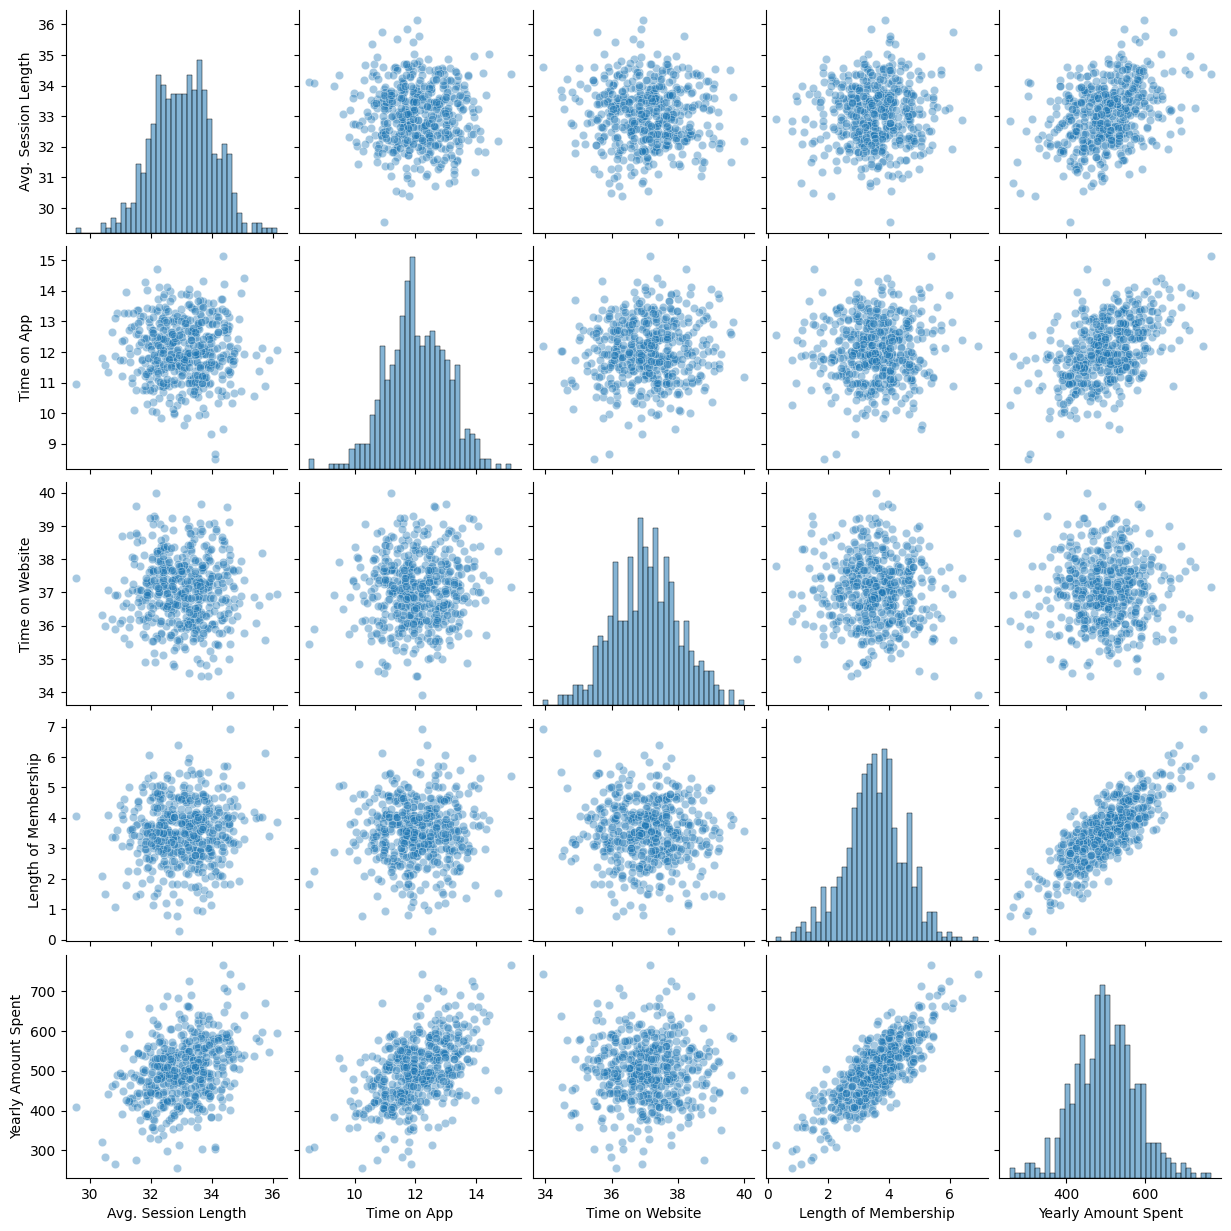

In [ ]:
sns.pairplot(customers,
             kind='scatter',
             plot_kws={'alpha':0.4},
             diag_kws={'alpha':0.55, 'bins':40})

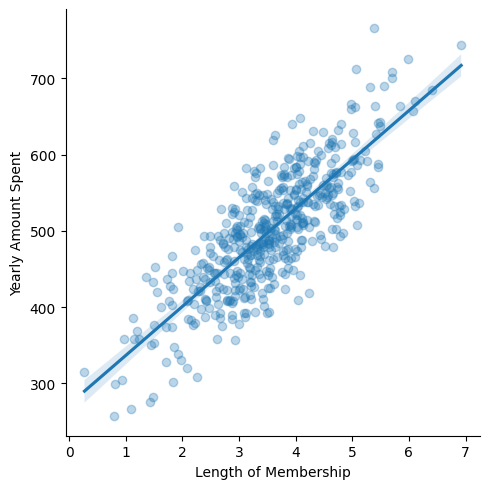

In [ ]:
# length of membership vs yearly amount spent
sns.lmplot(x='Length of Membership',
           y='Yearly Amount Spent',
           data=customers,
           scatter_kws={'alpha':0.3})

**Splitting the data**

X are the predictores, and y is the output. What we want to do is create a model that will take in the values in the X variable and predict y with a linear regression algorithm. We will use the SciKit Learn library to create the model.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [ ]:
X.head()
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=36)



**Training the Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_lm = lm.predict(X_test)

In [ ]:
# the coefficients
lm.coef_

array([25.5638106 , 38.48709329,  0.29632024, 61.20797211])

In [ ]:
lm.feature_names_in_

array(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'], dtype=object)

In [ ]:
lm_coef_df = pd.DataFrame({'feature':lm.feature_names_in_, 'lm_coef':lm.coef_})
lm_coef_df

,feature,lm_coef
0,Avg. Session Length,25.563811
1,Time on App,38.487093
2,Time on Website,0.296320
3,Length of Membership,61.207972


**Predicting Test Data**

In [ ]:
predictions = lm.predict(X_test)

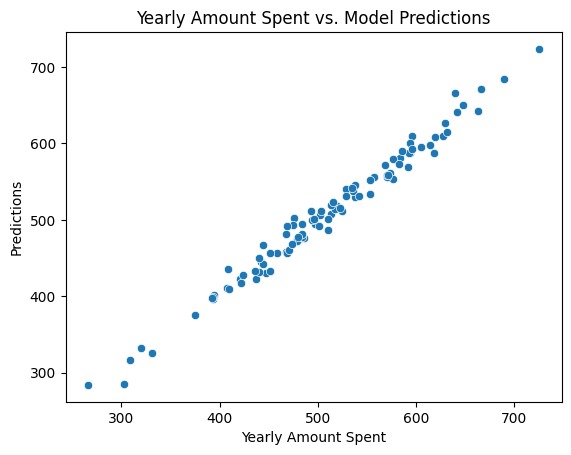

In [ ]:
sns.scatterplot(x=y_test, y=predictions)
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')
plt.show()


**Evaluation of the model**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [ ]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))
print('r2_value' , r2_score(y_test, predictions))

Mean Absolute Error: 9.321800975287507
Mean Squared Error: 137.75438289216288
Root Mean Squared Error: 11.73688131030398
r2_value 0.9822321548862691


**Conclution**

**Mean Absolute Error (MAE)**: The average absolute difference between the predicted and actual values is approximately 8.43 units. This suggests that, on average, our predictions are about 8.43 units away from the actual values.
MAE = Σ|actual - predicted| / n

**Mean Squared Error (MSE)**: The average of the squared differences between the predicted and actual values is 103.92. This value provides an indication of the overall variance of the residuals.
MSE = Σ(actual - predicted)^2 / n

**Root Mean Squared Error (RMSE)**: The square root of the MSE is approximately 10.19. This indicates the typical deviation of the predicted values from the actual values, with smaller values suggesting better model performance.
RMSE = √(Σ(actual - predicted)^2 / n)

**R-squared (R2) Value**: The R2 value of 0.981 indicates that approximately 98.1% of the variance in the dependent variable is explained by the independent variables in the model. This suggests that the model fits the data very well, with high predictive accuracy.

In summary, the model appears to perform very well, with low errors (MAE, MSE, and RMSE) and a high R2 value, indicating a strong ability to predict the dependent variable based on the independent variables.

In [ ]:
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import PredictionError

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


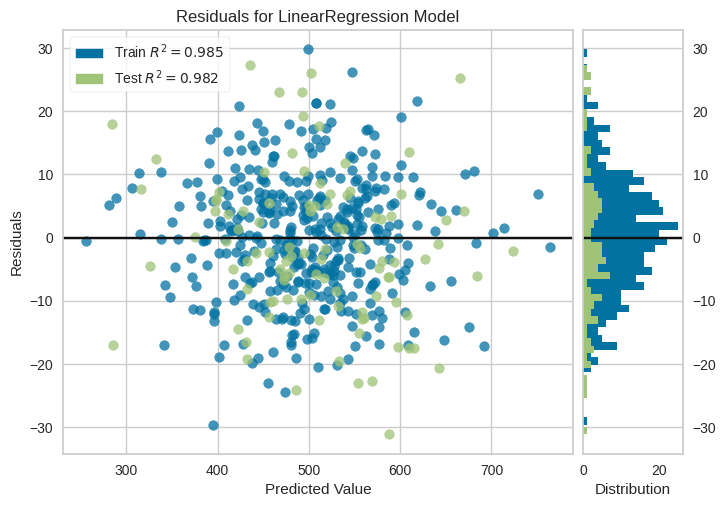

In [ ]:
viz_lm = residuals_plot(lm, X_train, y_train, X_test, y_test, hist=True, qqplot=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


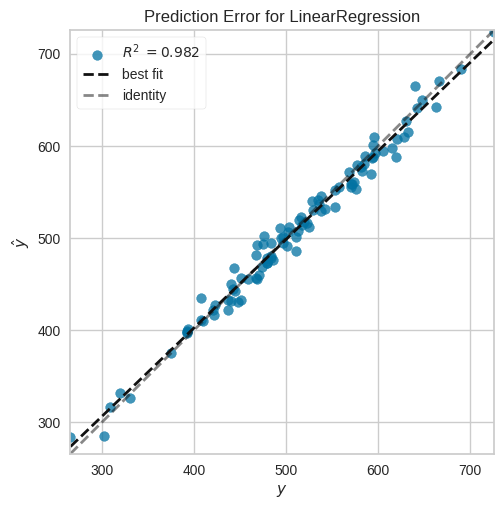

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
pred_viz_lm = PredictionError(lm)

pred_viz_lm.fit(X_train, y_train)
pred_viz_lm.score(X_test, y_test)
pred_viz_lm.show()

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor()

In [ ]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf_reg = rf_reg.predict(X_test)

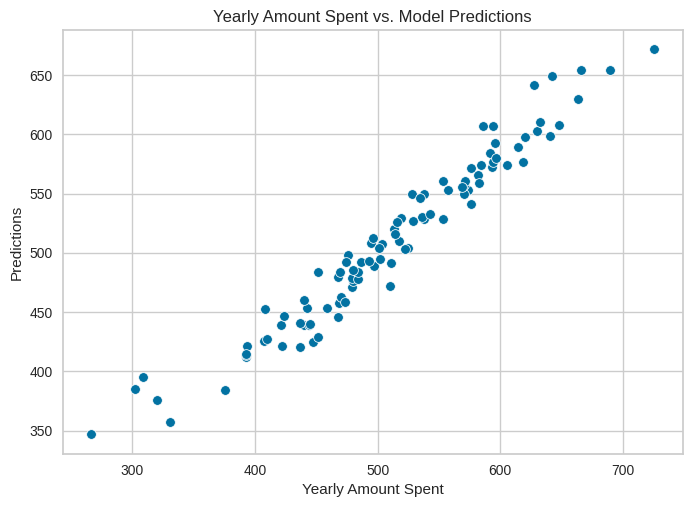

In [ ]:
sns.scatterplot(x=y_test, y=y_pred_rf_reg)
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [ ]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred_rf_reg))
print('Mean Squared Error:',mean_squared_error(y_test, y_pred_rf_reg))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, y_pred_rf_reg)))
print('r2_value' , r2_score(y_test, y_pred_rf_reg))

Mean Absolute Error: 18.16648544078082
Mean Squared Error: 597.779846831008
Root Mean Squared Error: 24.44953674062165
r2_value 0.9228971194410733


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


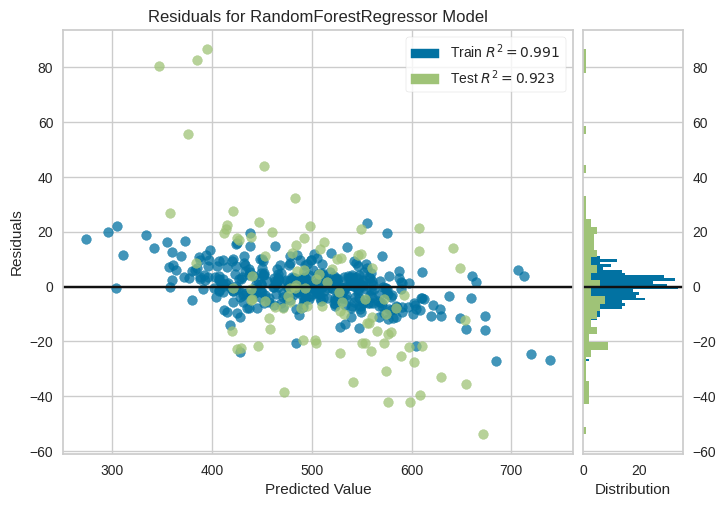

In [ ]:
viz_rf = residuals_plot(rf_reg, X_train, y_train, X_test, y_test, hist=True, qqplot=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


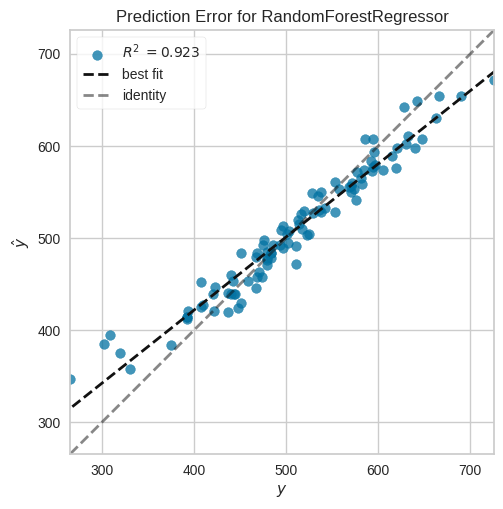

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
pred_viz_rf = PredictionError(rf_reg)

pred_viz_rf.fit(X_train, y_train)
pred_viz_rf.score(X_test, y_test)
pred_viz_rf.show()

[link text](https://)**Shrinkage methods | Ridge Regression**

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
import numpy as np

In [ ]:
ridge_alphas = [0.0001, 0.001,0.01, 0.1, 1, 10, 100, 1000, 10000]


In [ ]:
ridge_errors = {}
ridge_coefficients = {}

for alpha in ridge_alphas:
  ridge_model = Ridge(alpha=alpha)
  ridge_model.fit(X_train, y_train)
  y_pred = ridge_model.predict(X_test)
  r2 = r2_score(y_pred, y_test)
  ridge_errors[alpha] = r2

  feature_names = ridge_model.feature_names_in_
  ridge_coefficients[alpha] = dict(zip(feature_names, ridge_model.coef_))

In [ ]:
ridge_coefficients

{0.0001: {'Avg. Session Length': 25.563804286317993,
  'Time on App': 38.487082182482084,
  'Time on Website': 0.29631990253937635,
  'Length of Membership': 61.207957181139285},
 0.001: {'Avg. Session Length': 25.56374741932029,
  'Time on App': 38.48698217332281,
  'Time on Website': 0.2963168599520693,
  'Length of Membership': 61.207822791390186},
 0.01: {'Avg. Session Length': 25.563178763538716,
  'Time on App': 38.48598211000032,
  'Time on Website': 0.2962864352331956,
  'Length of Membership': 61.20647892644847},
 0.1: {'Avg. Session Length': 25.557493624905923,
  'Time on App': 38.47598430299772,
  'Time on Website': 0.29598230342906373,
  'Length of Membership': 61.19304353113685},
 1: {'Avg. Session Length': 25.500783793205738,
  'Time on App': 38.376288057668106,
  'Time on Website': 0.29295248953385133,
  'Length of Membership': 61.059014193241225},
 10: {'Avg. Session Length': 24.947486555668792,
  'Time on App': 37.40673238631634,
  'Time on Website': 0.2637713216102358

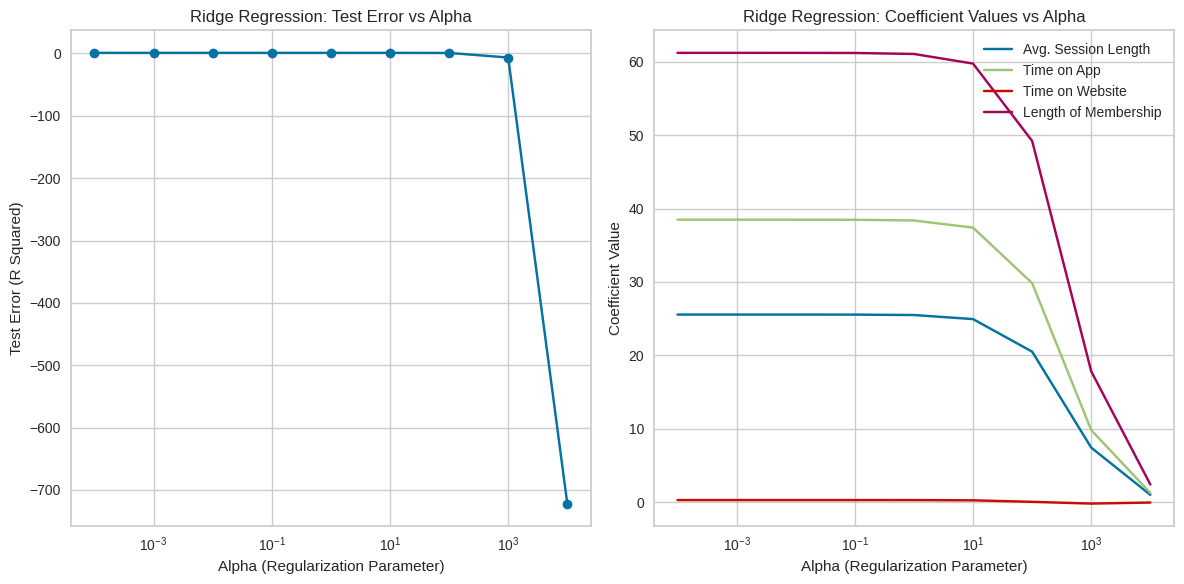

In [ ]:
# Plotting the results
# Creating a 2x1 grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting Test Error vs Alpha
axes[0].plot(list(ridge_errors.keys()), list(ridge_errors.values()), marker='o')
axes[0].set_xscale('log')  # Using log scale for better visualization
axes[0].set_xlabel('Alpha (Regularization Parameter)')
axes[0].set_ylabel('Test Error (R Squared)')
axes[0].set_title('Ridge Regression: Test Error vs Alpha')

# Plotting Coefficients vs Alpha
for feature_name in feature_names:
    axes[1].plot(list(ridge_coefficients.keys()), [coef[feature_name] for coef in ridge_coefficients.values()], label=feature_name)

axes[1].set_xscale('log')  # Using log scale for better visualization
axes[1].set_xlabel('Alpha (Regularization Parameter)')
axes[1].set_ylabel('Coefficient Value')
axes[1].legend()
axes[1].set_title('Ridge Regression: Coefficient Values vs Alpha')

plt.tight_layout()
plt.show()

In [ ]:
ridge_cv = RidgeCV(alphas=ridge_alphas, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], cv=5,
        scoring='r2')

In [ ]:
ridge_cv.score(X_test, y_test)

0.9822321424361445

In [ ]:
ridge_cv.score(X_train, y_train)

0.9848357679817537